Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Importing Data

In [2]:
df=pd.read_csv("/content/Q4_ADX_Sample_data.csv")
df.head(5)

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392


In [3]:
df.describe()
df.dtypes
print(df.describe(),df.dtypes,df.isnull(),df.isna())

             pub_id        app_id  ad_unit_code       requests   ae_responses  \
count  47935.000000  4.793500e+04  4.793500e+04   47935.000000   47935.000000   
mean     413.188213  5.015577e+07  2.268402e+10     585.827808     516.918202   
std      893.645657  2.465772e+07  1.215869e+08    3024.686475    2579.695718   
min       14.000000  1.624327e+07  2.247747e+10      16.000000      16.000000   
25%       14.000000  2.559680e+07  2.252151e+10      50.000000      47.000000   
50%       51.000000  4.786228e+07  2.275208e+10     109.000000     100.000000   
75%       72.000000  4.786228e+07  2.277034e+10     300.000000     275.000000   
max     2808.000000  9.567477e+07  2.283576e+10  156435.000000  156296.000000   

       ae_impressions     ae_clicks    ae_revenue  
count    47935.000000  47935.000000  47935.000000  
mean       257.055137     13.502514      2.098320  
std       1294.313552     73.922916     27.784254  
min         16.000000      0.000000      0.000111  
25%       

In [4]:
# This line selects the "app_id" and "pub_id" columns from the DataFrame df using double brackets, 
# and converts them to the string data type using the astype method.
df[["app_id", "pub_id"]] = df[["app_id", "pub_id"]].astype(str)
df.dtypes

date               object
pub_id             object
app_id             object
ad_unit_code        int64
country            object
requests            int64
ae_responses        int64
ae_impressions      int64
ae_clicks           int64
ae_revenue        float64
dtype: object

In [5]:
df['app_id'].unique()
df['pub_id'].unique()

array(['1987', '14', '879', '281', '2808', '51', '107', '34', '72'],
      dtype=object)

In [6]:
# This line replaces any occurrence of '1987' in the "pub_id" column with 'Pub1', and so on for the other values.
df['pub_id']=df['pub_id'].replace('1987','Pub1').replace('14','Pub2').replace('879','Pub3').replace('281','Pub4').replace('2808','Pub5').replace('51','Pub6').replace('107','Pub7').replace('34','Pub8').replace('72','Pub9')
# This line replaces any occurrence of '16243270' in the "app_id" column with 'App1', and so on for the other values.
df['app_id']=df['app_id'].replace('16243270','App1').replace('22693095','App2').replace('25596802','App3').replace('40931528','App4').replace('43840611','App5').replace('47862278','App6').replace('63338696','App7').replace('66981243','App8').replace('84650721','App9').replace('95674771','App10')

In [12]:
df['show-rate']=df['ae_impressions']/df['ae_responses']
df['show-rate']
df['click-rate']=df['ae_clicks']/df['ae_impressions']
df['click-rate'].head(5)

0    0.000000
1    0.000000
2    0.022831
3    0.194767
4    0.128205
Name: click-rate, dtype: float64

Anomaly Detection

Text(0.5, 1.0, 'Click rate')

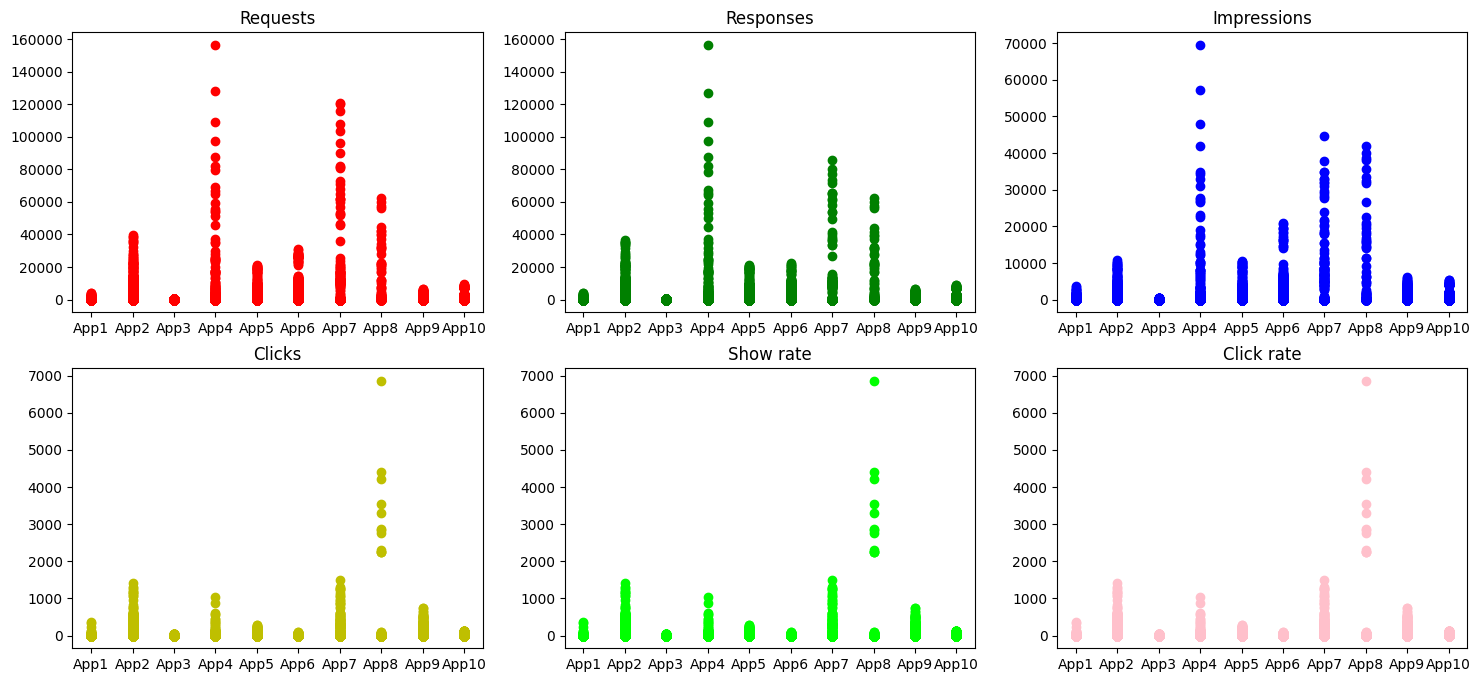

In [11]:
plt.rcParams["figure.figsize"] = (18,8) 
# This line creates the first subplot in a 2x3 grid of subplots.
plt.subplot(2,3,1)
# This line selects the "app_id" and "requests" columns from the DataFrame df.
# The values in these columns are used as the x and y coordinates of the scatter plot.
x1=df['app_id']
y1=df['requests']
# This line creates a scatter plot with x1 and y1 as the x and y coordinates, and sets the color of the markers to red.
plt.scatter(x1,y1,c='r')
# This line sets the title of the subplot to "Requests".
plt.title("Requests")
#plt.grid()


plt.subplot(2,3,2)
x2=df['app_id']
y2=df['ae_responses']
plt.scatter(x2,y2,c='g')
plt.title("Responses")
#plt.grid()


plt.subplot(2,3,3)
x3=df['app_id']
y3=df['ae_impressions']
plt.scatter(x3,y3,c='b')
plt.title("Impressions")
#plt.grid()


plt.subplot(2,3,4)
x4=df['app_id']
y4=df['ae_clicks']
plt.scatter(x4,y4,c='y')
plt.title("Clicks")
#plt.grid()


plt.subplot(2,3,5)
x5=df['app_id']
y5=df['show-rate']
plt.scatter(x4,y4,c='lime')
plt.title("Show rate")
#plt.grid()


plt.subplot(2,3,6)
x6=df['app_id']
y6=df['click-rate']
plt.scatter(x4,y4,c='pink')
plt.title("Click rate")
#plt.grid()